In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 4.

This question consists of two parts:<br>
  1) swapping of the three R, G, B channels<br>
  2) image rotation and translation

In [2]:
import numpy as np
import cv2


In [3]:
def rgb_swap(img):
  '''
  write a program which creates three images with RGB channels swapped in each of the image. let the original image be BGR then the second and the third 
  output images should be RBG and GRB respectively. 

  Inputs:
  - img - original image

  Outputs: 
  - out_im1 - numpy array (of dtype np.uint8) containing the output image in BGR.
  - out_im2 - numpy array (of dtype np.uint8) containing the output image in RBG.
  - out_im3 - numpy array (of dtype np.uint8) containing the output image in GRB. 

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  out_im1 = np.copy(img)
  out_im2 = np.copy(img)
  out_im3 = np.copy(img)
  out_im2 = out_im2[:,:,[2,0,1]]
  out_im3 = out_im3[:,:,[1,2,0]]

  return (out_im1, out_im2, out_im3)
    
  #############################
  # End your code here ########
  #############################    

Text(0.5, 1.0, 'Basic RGB')

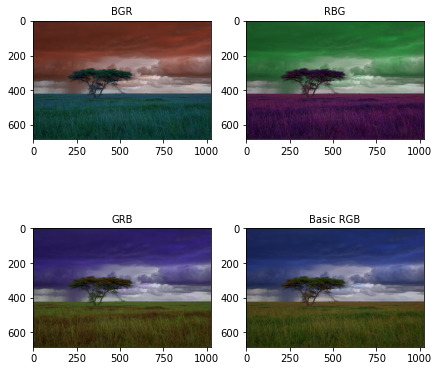

In [4]:
## Test run

## Write a script which runs the above function for the given image and plot the different images in a pyplot subplot observing the changes.
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

im = cv2.imread('q2im1.jpg')
(im1, im2, im3) = rgb_swap(im)
rcParams['figure.figsize'] = 7 , 7
rcParams["axes.titlesize"] = 10

p1 = plt.subplot(2, 2, 1)
plt.imshow(im1[:,:])
p1.set_title("BGR")
p2 = plt.subplot(2, 2, 2)
plt.imshow(im2[:,:])
p2.set_title("RBG")
p3 = plt.subplot(2, 2, 3)
plt.imshow(im3[:,:])
p3.set_title("GRB")
# [:,:,[2,1,0]] has been done to swap the color channel while displaying in the subplots since, opencv has it's default color space as BGR.
p4 = plt.subplot(2, 2, 4)
plt.imshow(im[:,:,[2,1,0]])
p4.set_title("Basic RGB")

In [5]:
def transform_image(img, shift, theta):
  '''
  write a program which translate and rotates a white square of size 100x100 pixels. First create an image of size 512x512 pixels having black background 
  and a square of size 100x100 in the center of the image. now write a code which shifts the square by given pixel value and rotates it counter clockwise by 
  given angle theta.

  Inputs:
  - img - original image
  - shift - a 2x1 array having the pixel shift value in x direction and y direction
  - theta - angle of roatation in degrees in counter clockwise direction

  Outputs: 
  - out_im - numpy array (of dtype np.uint8) containing the output image.

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
  
  out_img = np.zeros(img.shape)  
  hlf = np.array([256, 256])
  offx = hlf[0]+shift[0]
  offy = hlf[1]+shift[1]
  sw_rot_mat = np.array([[np.cos(theta*np.pi/180), np.sin(theta*np.pi/180)], [-np.sin(theta*np.pi/180), np.cos(theta*np.pi/180)]])
  for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
      nw_vct = np.array([j-offx, i-offy])
      sw_coord = hlf + sw_rot_mat@nw_vct
      if sw_coord[0] < 512 and sw_coord[1] < 512 and sw_coord[0] >= 0 and sw_coord[1] >= 0:
        out_img[i,j] = img[int(sw_coord[1]), int(sw_coord[0])]

  #############################
  # End your code here ########
  #############################    

  return np.uint8(out_img)

Text(0.5, 1.0, 'Shift: (-50,205) px; Rotate: 120 deg')

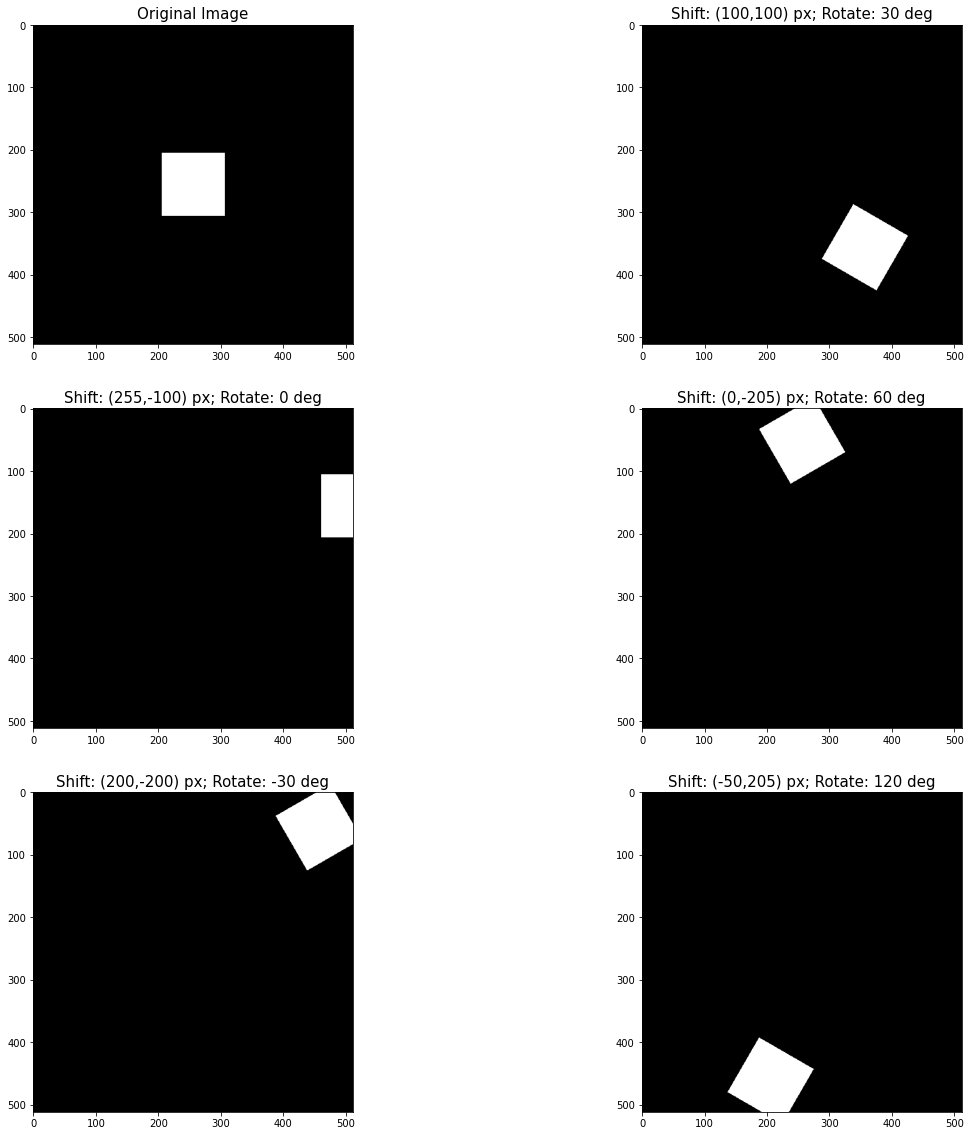

In [6]:
# Write a script which tests your function for atleast 5 different combinations of rotation and translation

img = np.zeros((512,512))
img[206:307, 206:307] = 255

tc1 = transform_image(img, np.array([100,100]), 30)
tc2 = transform_image(img, np.array([255,-100]), 0)
tc3 = transform_image(img, np.array([0,-205]), 60)
tc4 = transform_image(img, np.array([200,-200]), -30)
tc5 = transform_image(img, np.array([-50,205]), 120)

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 20 , 20
rcParams["axes.titlesize"] = 15

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")
ax2.imshow(tc1, cmap='gray')
ax2.set_title("Shift: (100,100) px; Rotate: 30 deg")
ax3.imshow(tc2, cmap='gray')
ax3.set_title("Shift: (255,-100) px; Rotate: 0 deg")
ax4.imshow(tc3, cmap='gray')
ax4.set_title("Shift: (0,-205) px; Rotate: 60 deg")
ax5.imshow(tc4, cmap='gray')
ax5.set_title("Shift: (200,-200) px; Rotate: -30 deg")
ax6.imshow(tc5, cmap='gray')
ax6.set_title("Shift: (-50,205) px; Rotate: 120 deg")